In [1]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from IPython.display import display
from scipy.stats import wilcoxon, probplot, ranksums, ttest_ind, ttest_1samp, pearsonr
import matplotlib.patches as patches
from matplotlib import rc
from matplotlib.patches import FancyArrowPatch
from statsmodels.stats import multitest
import statsmodels.api as sm
from Figures import utils

fs = 12*1.3
mpl.rcParams['axes.titlesize'] = fs
mpl.rcParams['axes.labelsize'] = fs
mpl.rcParams['xtick.labelsize'] = fs
mpl.rcParams['ytick.labelsize'] = fs
mpl.rcParams['legend.fontsize'] = 12
title=True

rc('text', usetex=True)

In [21]:
results_path = "/home/mdt20/Code/mldecoders/results/0.5-8Hz/"
prediction_window = 250
study = "individuals"

dfs = utils.load_hugo_data(study, prediction_window, results_path)

colors = {"ridge":"#2A2B2DFF", "eegnet":"#D9514EFF", "detaillez":"#2DA8D8FF"}
models = ['ridge', 'CNN', 'FCNN']
aliases = ['ridge', 'eegnet', 'detaillez']

# Subject level models: test for normality

Test for normality:

In [22]:
dfs['detaillez']['means'].mean()

0.1928490567962607

/home/mdt20/miniconda3/envs/mldecoders/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/home/mdt20/miniconda3/envs/mldecoders/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/home/mdt20/miniconda3/envs/mldecoders/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/home/mdt20/miniconda3/envs/mldecoders/lib/python3.9/site-packag

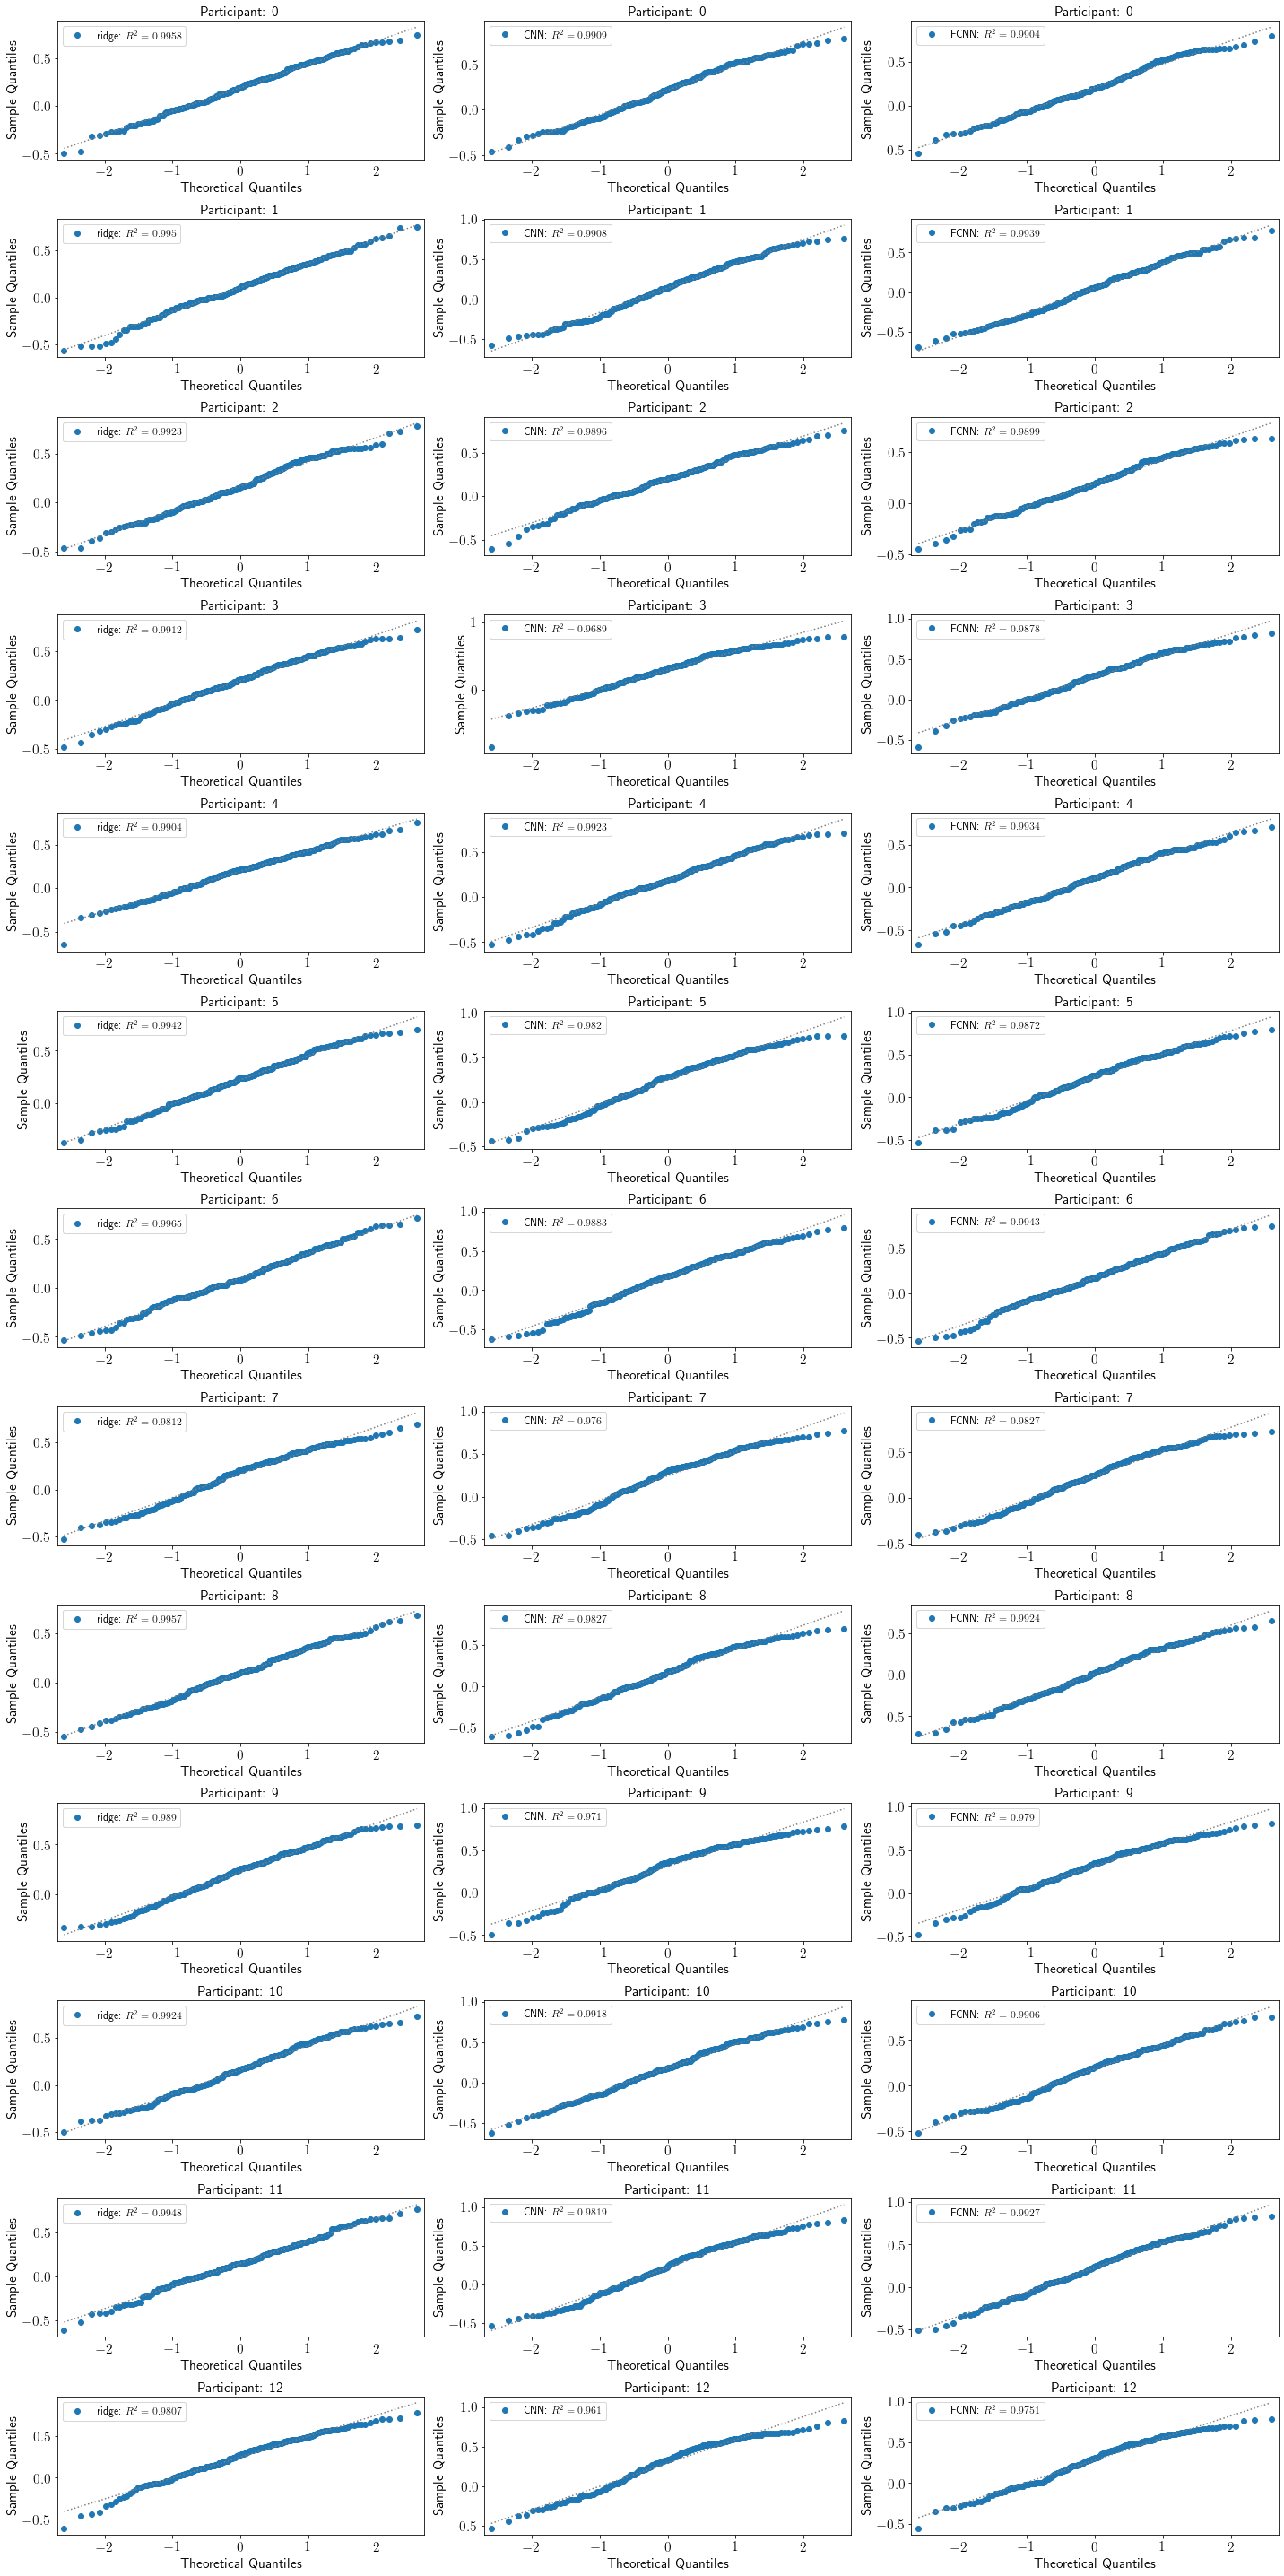

In [23]:
fig, axs = plt.subplots(13, 3, tight_layout=True, figsize=(20,40))

for i, mdl in enumerate(aliases):
    for j in range(13):
        ax = axs[j, i]
        p = sm.qqplot(np.array(dfs[mdl].loc[str(j)]['correlations']), line='s', ax = ax, color=colors[mdl]);
        r2 = pearsonr(ax.lines[0].get_xdata(), ax.lines[0].get_ydata())[0]**2
        label = f"{models[i]}: $R^2 = {np.round(r2, 4)}$"
        ax.set_title(f"Participant: {j}")
        ax.lines[1].set_color("grey")
        ax.lines[1].set_linestyle('dotted')
        
        ax.legend([ax.lines[0]], [label])
        
plt.show()

/home/mdt20/miniconda3/envs/mldecoders/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/home/mdt20/miniconda3/envs/mldecoders/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/home/mdt20/miniconda3/envs/mldecoders/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/home/mdt20/miniconda3/envs/mldecoders/lib/python3.9/site-packag

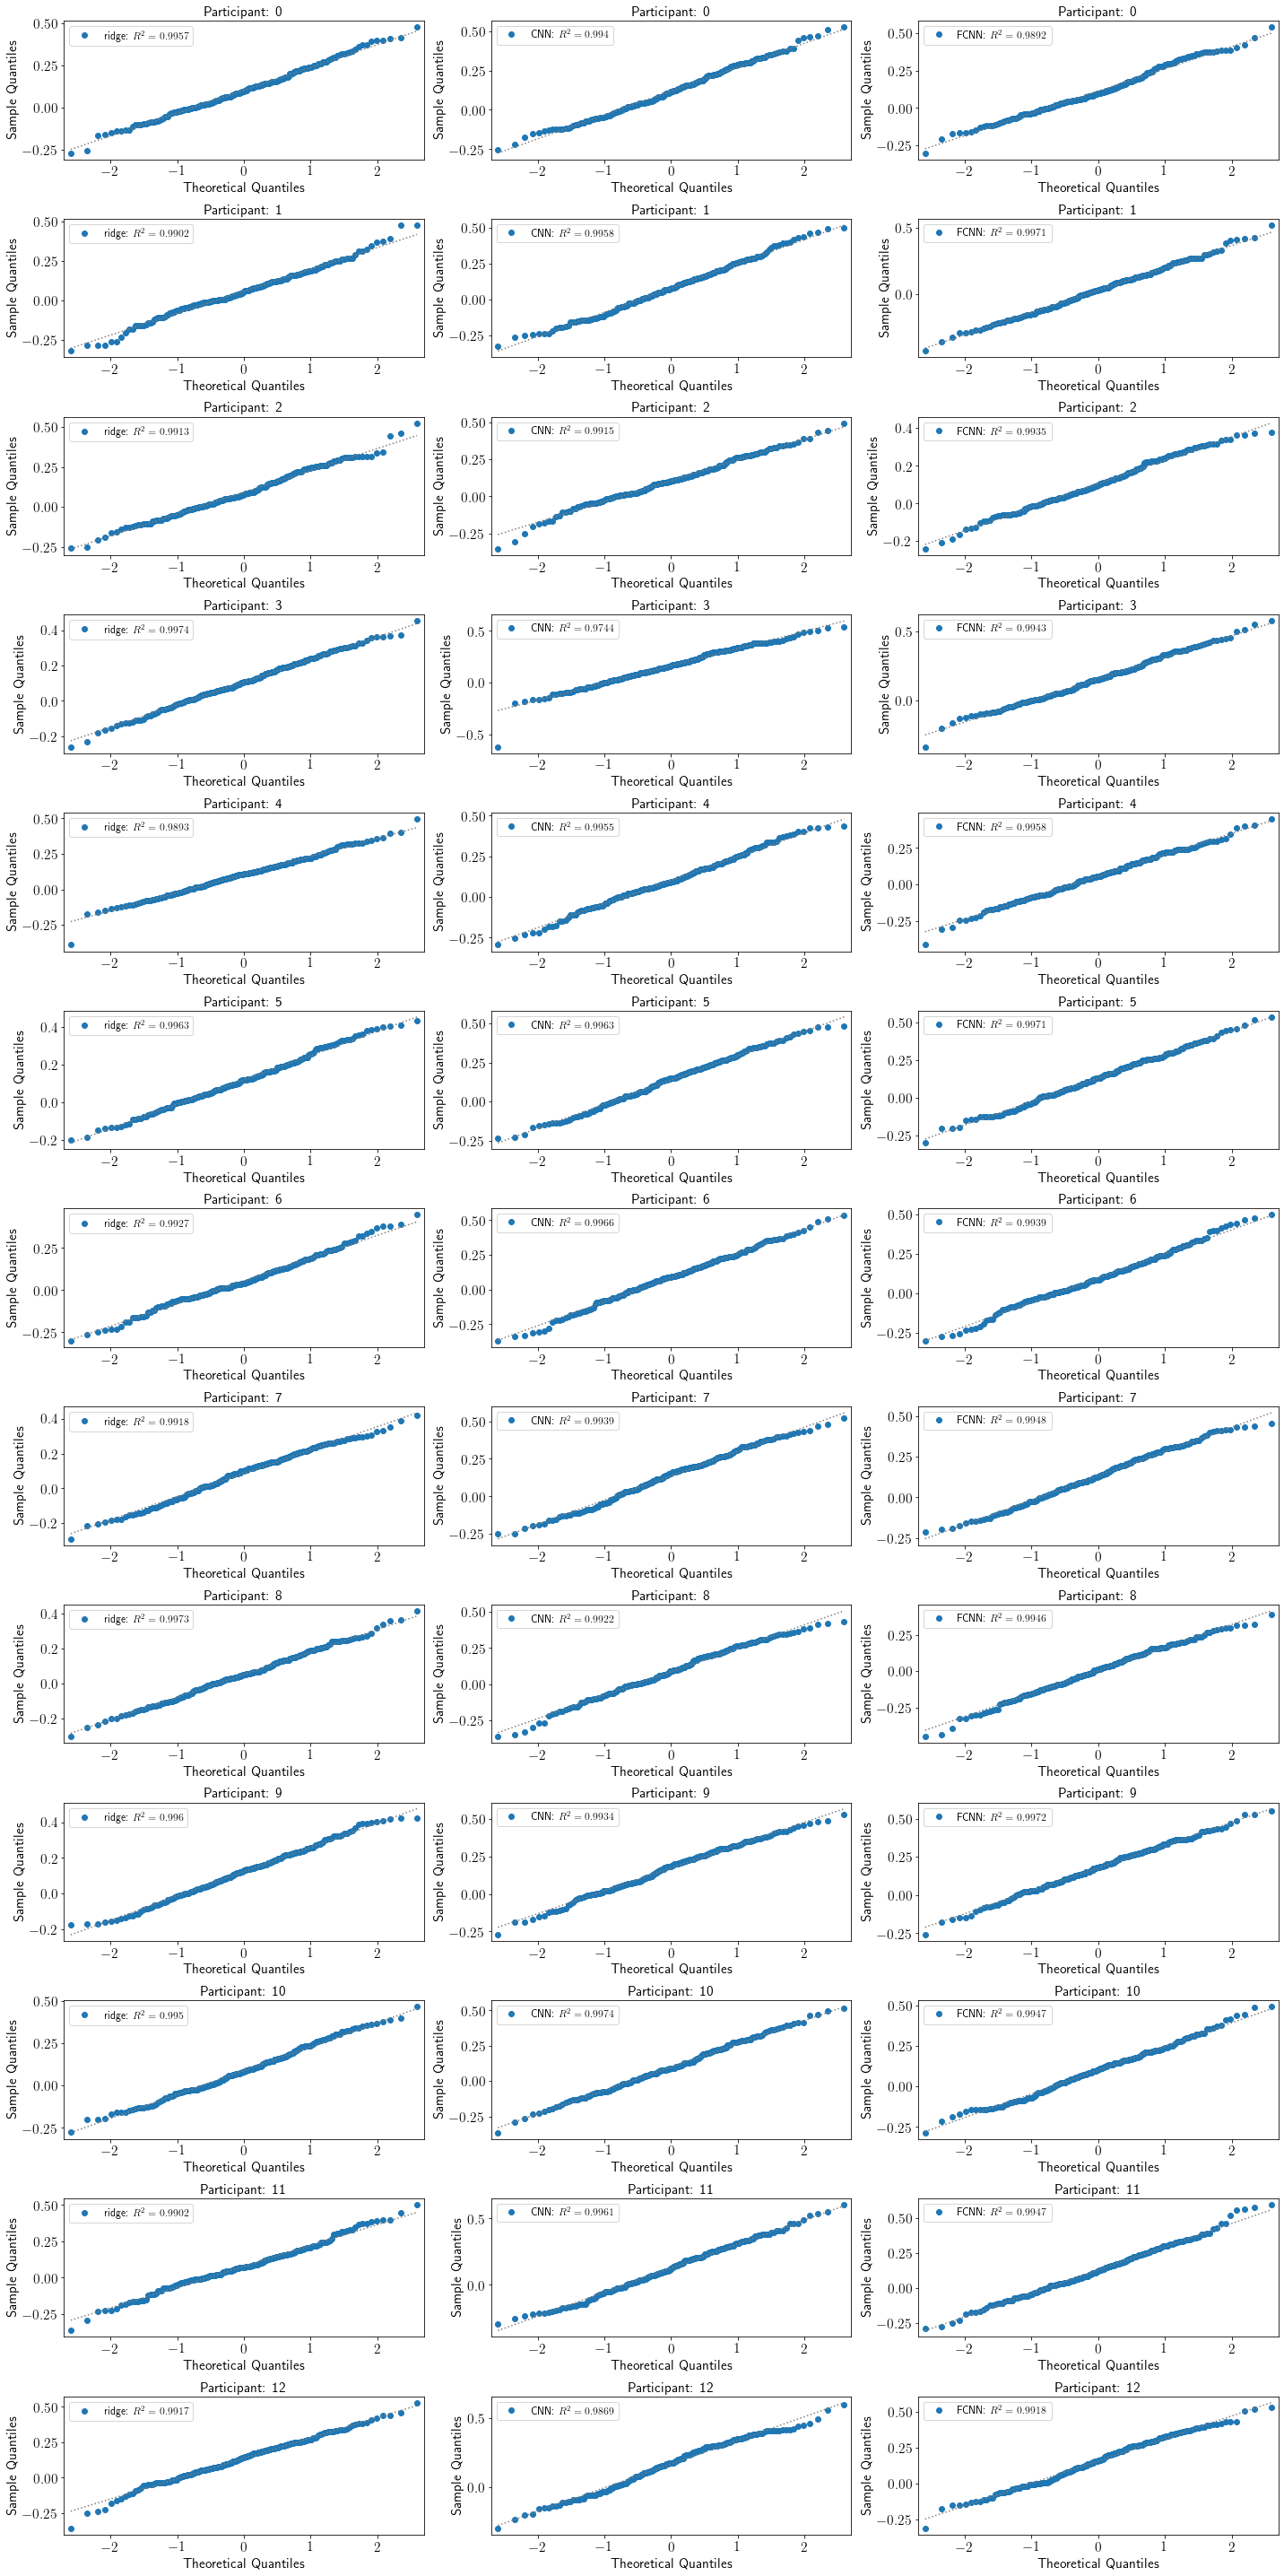

In [24]:
fig, axs = plt.subplots(13, 3, tight_layout=True, figsize=(20,40))

for i, mdl in enumerate(["ridge", "eegnet", "detaillez"]):
    for j in range(13):
        ax = axs[j, i]
        p = sm.qqplot(0.5*np.arctanh(np.array(dfs[mdl].loc[str(j)]['correlations'])), line='s', ax = ax, color=colors[mdl]);
        r2 = pearsonr(ax.lines[0].get_xdata(), ax.lines[0].get_ydata())[0]**2
        label = f"{models[i]}: $R^2 = {np.round(r2, 4)}$"
        ax.set_title(f"Participant: {j}")
        ax.lines[1].set_color("grey")
        ax.lines[1].set_linestyle('dotted')
        
        ax.legend([ax.lines[0]], [label])
        
plt.show()

# Subject-level models: check null scores are null

In [25]:
print(ttest_1samp(dfs['ridge']["null_means"],0))
print(ttest_1samp(dfs['eegnet']["null_means"],0))
print(ttest_1samp(dfs['detaillez']["null_means"],0))

Ttest_1sampResult(statistic=2.0349375423452583, pvalue=0.06456440241258267)
Ttest_1sampResult(statistic=0.7689739602425364, pvalue=0.4567774832052165)
Ttest_1sampResult(statistic=0.03447133458100025, pvalue=0.9730680637857958)


# Figure 1: Two versions

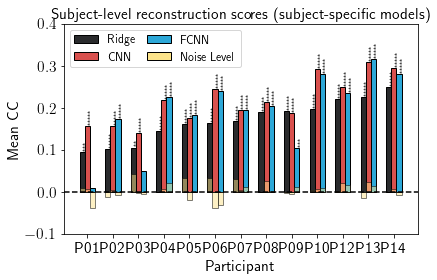

In [26]:
fig = plt.figure(111, tight_layout=True)

colors = ["#28334AFF", "#12a4d9", "#e2d810"]
colors = ["#2A2B2DFF", "#D9514EFF", "#2DA8D8FF"]


width = 1/5
nsigma = 1
for i, model in enumerate(aliases):
    x = np.arange(dfs[model].index.size)
    x = width*(i-1) + x
    height = dfs[model]["means"]
    null_height = dfs[model]["null_means"]

    plt.bar(x, height, width=width, color=colors[i], alpha=1, edgecolor='black')
    plt.bar(x, null_height, width=width, color='#FCE38A', alpha=.5, edgecolor='black')
    #plt.axhline(0, color="black")
    
    for j, participant in enumerate(dfs[model].index):
        
        if height[j]>=0:
            plt.text(x[int(j)]+0.052, height[j]+0.005, dfs[model]["stars"][j], fontsize='xx-small', rotation='vertical', ha='center')
        elif height[participant]<0:
            plt.text(x[int(j)]-0.12, height[j]-0.005, dfs[model]["stars"][j], fontsize='xx-small')

        
labels = ["Ridge", "CNN", "FCNN", "Noise Level"]
handles = [plt.Rectangle((0,0),1,1, facecolor=colors[i], edgecolor='black') for i in range(3)] + \
            [plt.Rectangle((0,0),1,1, facecolor='#FCE38A', edgecolor='black')]
plt.legend(handles, labels, ncol=2, columnspacing=1)

plt.xticks(x-0.2, utils._h_participant_names)

plt.ylabel("Mean CC")
plt.xlabel("Participant")
plt.title("Subject-level reconstruction scores (subject-specific models)");
plt.ylim(-0.1, 0.4)
plt.axhline(0, color='black', linestyle='dashed')

[432. 288.]


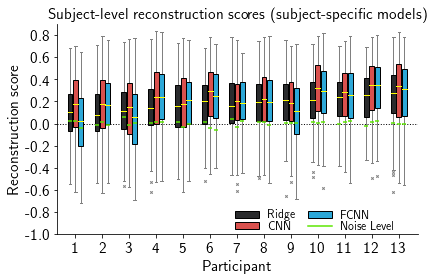

In [27]:
fig = plt.figure(111, tight_layout=True)

colors = ["#2A2B2DFF", "#D9514EFF", "#2DA8D8FF"]


width = 1/5
nsigma = 1
for i, model in enumerate(aliases):
    x = np.arange(dfs[model].index.size)
    x = width*(i-1) + x
    data = dfs[model]["correlations"]
    null_height = dfs[model]["null_medians"]

    plt.boxplot(data,
                positions = x,
                widths=0.9*width,
                patch_artist=True,
                boxprops={'facecolor':colors[i], 'alpha':1, 'edgecolor':'black'},
                flierprops={'marker':'x', 'markersize':2.5, 'markeredgecolor':'grey'},
                whiskerprops={'color':'grey'},
                capprops={'color':'grey'},
                medianprops={'color':'yellow'})
    plt.scatter(x, null_height, zorder=np.inf, color='#5ce600', marker='_', facecolor=None, s=20)
        
labels = ["Ridge", "CNN", "FCNN", "Noise Level"]
handles = [plt.Rectangle((0,0),1,1, facecolor=colors[i], edgecolor='black') for i in range(3)] + \
            [Line2D([0], [0], c='#5ce600')]
leg = plt.legend(handles, labels, loc=(0.48,-.012), frameon=False, ncol=2, handleheight=.5, labelspacing=0.05, columnspacing=1)
# for lh in leg.legendHandles: 
#     lh.set_alpha(.2)

plt.yticks(np.round(np.linspace(-1, 1, 11),1), np.round(np.linspace(-1, 1, 11),1))
plt.xticks(x-0.2, range(1,14))

plt.ylabel("Reconstruction score")
plt.xlabel("Participant")
if title: plt.title("Subject-level reconstruction scores (subject-specific models)");
plt.ylim(-1, .9)
#plt.axhline(0, color='black', linestyle='dotted')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = plt.gcf()
print(fig.get_size_inches()*72)

plt.axhline(0, color='black', linestyle='dotted', linewidth=1, zorder=-np.inf)
# for y in np.round(np.linspace(-1, 1, 11),1):
#     if y == 0: continue
#     plt.axhline(y, color='grey', linestyle='--', linewidth=.5, zorder=-np.inf)
# plt.gca().set_axisbelow(True)

# plt.savefig("/home/mdt20/Documents/ESA_plots/subj_lvl_hugo.eps")

# P-values for subject-level analysis

In [28]:
def format_pvalues(p_vals):
    formatted_p_vals = []
    for p_val in p_vals:
        if p_val < 0.05:
            formatted_p_vals.append(f"\\textbf{{{p_val:.2e}}}")
        else:
            formatted_p_vals.append(f"{p_val:.2e}")
    return " & ".join(formatted_p_vals) + " \\\\"

### P(not null)

In [29]:
print("ridge\n", 
      format_pvalues(dfs['ridge']['p-corrected']))
print("eegnet\n", 
      format_pvalues(dfs['eegnet']['p-corrected']),
      "\n")
print("detaillez\n", 
      format_pvalues(dfs['detaillez']['p-corrected'])
     )

ridge
 \textbf{4.00e-04} & \textbf{3.47e-06} & \textbf{8.42e-03} & \textbf{3.83e-08} & \textbf{5.13e-07} & \textbf{1.99e-07} & \textbf{1.15e-08} & \textbf{1.36e-13} & \textbf{8.01e-16} & \textbf{9.34e-15} & \textbf{1.88e-19} & \textbf{1.16e-18} & \textbf{8.95e-21} \\
eegnet
 \textbf{4.59e-07} & \textbf{1.03e-06} & \textbf{1.42e-06} & \textbf{9.96e-12} & \textbf{1.78e-11} & \textbf{2.46e-20} & \textbf{6.17e-13} & \textbf{1.57e-11} & \textbf{9.55e-13} & \textbf{2.63e-20} & \textbf{2.34e-15} & \textbf{2.60e-23} & \textbf{3.09e-20} \\ 

detaillez
 8.59e-02 & \textbf{3.16e-10} & 5.78e-02 & \textbf{1.34e-12} & \textbf{1.57e-11} & \textbf{8.95e-21} & \textbf{4.28e-14} & \textbf{1.75e-13} & \textbf{3.49e-04} & \textbf{2.24e-20} & \textbf{3.79e-15} & \textbf{7.54e-27} & \textbf{5.29e-23} \\


### P(not zero)

In [30]:
p_r_0 = [ttest_1samp(dfs['ridge'].loc[str(p)]['correlations'], 0, alternative='greater')[1] for p in range(13)]
p_en_0 = [ttest_1samp(dfs['eegnet'].loc[str(p)]['correlations'], 0, alternative='greater')[1] for p in range(13)]
p_dt_0 = [ttest_1samp(dfs['detaillez'].loc[str(p)]['correlations'], 0, alternative='greater')[1] for p in range(13)]

In [31]:
p_vals = p_r_0+p_en_0+p_r_0
p_vals = multitest.fdrcorrection(p_vals)[1]
p_r_0 = pd.Series(p_vals[:13])
p_en_0 = pd.Series(p_vals[13:13*2])
p_dt_0 = pd.Series(p_vals[13*2:13*3])

In [32]:
print("dt>r\n", 
      format_pvalues(p_r_0),
     "\n")
print("en>r\n", 
      format_pvalues(p_en_0),
      "\n")
print("en=dt\n", 
      format_pvalues(p_dt_0),
     "\n")

dt>r
 \textbf{2.70e-23} & \textbf{4.09e-09} & \textbf{4.69e-19} & \textbf{2.76e-26} & \textbf{5.66e-26} & \textbf{6.38e-31} & \textbf{4.31e-09} & \textbf{3.80e-18} & \textbf{2.32e-08} & \textbf{1.07e-29} & \textbf{4.41e-17} & \textbf{2.39e-14} & \textbf{4.42e-32} \\ 

en>r
 \textbf{2.71e-24} & \textbf{1.14e-10} & \textbf{2.16e-23} & \textbf{1.23e-34} & \textbf{1.31e-20} & \textbf{4.40e-29} & \textbf{2.38e-12} & \textbf{7.81e-27} & \textbf{2.14e-13} & \textbf{2.35e-40} & \textbf{5.78e-16} & \textbf{9.66e-20} & \textbf{8.93e-33} \\ 

en=dt
 \textbf{2.70e-23} & \textbf{4.09e-09} & \textbf{4.69e-19} & \textbf{2.76e-26} & \textbf{5.66e-26} & \textbf{6.38e-31} & \textbf{4.31e-09} & \textbf{3.80e-18} & \textbf{2.32e-08} & \textbf{1.07e-29} & \textbf{4.41e-17} & \textbf{2.39e-14} & \textbf{4.42e-32} \\ 



### P(compare models)

In [33]:
p_dt_r = [ttest_ind(dfs['detaillez'].loc[str(p)]['correlations'], dfs["ridge"].loc[str(p)]['correlations'], alternative='two-sided')[1] for p in range(13)]
p_en_r = [ttest_ind(dfs['eegnet'].loc[str(p)]['correlations'], dfs["ridge"].loc[str(p)]['correlations'], alternative='two-sided')[1] for p in range(13)]
p_dt_en = [ttest_ind(dfs['detaillez'].loc[str(p)]['correlations'], dfs["eegnet"].loc[str(p)]['correlations'])[1] for p in range(13)]

In [34]:
p_vals = p_dt_r+p_en_r+p_dt_en
p_vals = multitest.fdrcorrection(p_vals)[1]
p_dt_r = pd.Series(p_vals[:13])
p_en_r = pd.Series(p_vals[13:13*2])
p_dt_en = pd.Series(p_vals[13*2:13*3])

In [35]:
print("dt>r\n", 
      format_pvalues(p_dt_r),
     "\n")
print("en>r\n", 
      format_pvalues(p_en_r),
      "\n")
print("en=dt\n", 
      format_pvalues(p_dt_en),
     "\n")

dt>r
 7.52e-01 & 1.10e-01 & 4.41e-01 & \textbf{5.95e-03} & \textbf{3.60e-03} & 7.52e-01 & \textbf{1.54e-02} & \textbf{9.20e-03} & \textbf{7.09e-03} & \textbf{2.68e-03} & 6.62e-01 & \textbf{9.04e-03} & 4.05e-01 \\ 

en>r
 5.30e-01 & 4.05e-01 & 4.41e-01 & \textbf{2.68e-03} & 8.51e-01 & 4.41e-01 & 1.10e-01 & \textbf{8.00e-03} & \textbf{4.76e-02} & \textbf{5.91e-03} & 7.52e-01 & \textbf{2.37e-02} & 1.79e-01 \\ 

en=dt
 8.51e-01 & \textbf{9.25e-03} & 9.99e-01 & 7.52e-01 & \textbf{8.00e-03} & 7.52e-01 & 7.52e-01 & 8.51e-01 & \textbf{1.51e-05} & 8.51e-01 & 8.51e-01 & 8.51e-01 & 7.52e-01 \\ 



### p(population: compare means)

In [43]:
print("dt>r:", ranksums(dfs['detaillez']['means'], dfs['ridge']['means'], alternative='greater')[1]*3)
print("en>r:", ranksums(dfs['eegnet']['means'], dfs['ridge']['means'], alternative='greater')[1]*3)
print("dt=en:", ranksums(dfs['detaillez']['means'], dfs['eegnet']['means'], alternative='two-sided')[1])

dt>r: 0.2864665402017863
en>r: 0.12870895429885992
dt=en: 0.6629111455726036


### p(pop: compare stds)

In [18]:
print("dt>r:", ranksums(dfs['detaillez']['stds'], dfs['ridge']['stds'], alternative='two-sided')[1]*3)
print("en>r:", ranksums(dfs['eegnet']['stds'], dfs['ridge']['stds'], alternative='greater')[1]*3)
print("en>dt:", ranksums(dfs['detaillez']['stds'], dfs['eegnet']['stds'], alternative='less')[1]*3)

dt>r: 0.03862812550735578
en>r: 0.00030127054156784734
en>dt: 0.014407116476142305


### p(pop: compare inverse coeff vars)

In [19]:
print("dt>r:", ranksums(dfs['detaillez']['means']/dfs['detaillez']['stds'], dfs['ridge']['means']/dfs['ridge']['stds'], alternative='two-sided')[1]*3)
print("en>r:", ranksums(dfs['eegnet']['means']/dfs['eegnet']['stds'], dfs['ridge']['means']/dfs['ridge']['stds'], alternative='greater')[1]*3)
print("dt>r:", ranksums(dfs['detaillez']['means']/dfs['detaillez']['stds'], dfs['eegnet']['means']/dfs['eegnet']['stds'], alternative='greater')[1]*3)

dt>r: 0.12840475254133354
en>r: 0.0817055850412161
dt>r: 0.8853876769721578


# Figure 2: variability of mean/std

In [20]:
colors = {"ridge":"#2A2B2DFF", "eegnet":"#D9514EFF", "detaillez":"#2DA8D8FF"}
prediction_windows = np.array(
    [3, 4, 5, 6, 7, 8, 9, 9, 11, 12, 13, 14, 15, 20, 30, 40, 50] + [125*i for i in range(1, 11)]
)

variances = {}
null_variances = {}
means = {}
null_means = {}
coeff_vars = {}

for window in prediction_windows:
    variances[window] = {}
    null_variances[window] = {}
    means[window] = {}
    null_means[window] = {}
    coeff_vars[window] = {}
    
    for model in ["ridge", "eegnet", "detaillez"]:
        r = json.load(open(os.path.join(results_path, model, study + "_results_{}".format(window) + ".json"), "r"))
        df = pd.DataFrame.from_dict(r).transpose()
        
        variances[window][model] = [np.asarray(df.loc[str(x)]["correlations"]) for x in range(13)]
        variances[window][model] = [x[~np.isnan(x)].std(ddof=1) for x in variances[window][model]]
        null_variances[window][model] = [np.asarray(df.loc[str(x)]["null_correlations"]) for x in range(13)]
        null_variances[window][model] = [x[~np.isnan(x)].std(ddof=1) for x in null_variances[window][model]]
        means[window][model] = [np.asarray(df.loc[str(x)]["correlations"]) for x in range(13)]
        means[window][model] = [x[~np.isnan(x)].mean() for x in means[window][model]]
        null_means[window][model] = [np.asarray(df.loc[str(x)]["null_correlations"]).mean() for x in range(13)]
        null_means[window][model] = [x[~np.isnan(x)].mean() for x in null_means[window][model]]
        coeff_vars[window][model] = np.array(means[window][model])/np.array(variances[window][model])
        
variances = pd.DataFrame.from_dict(variances).T
null_variances = pd.DataFrame.from_dict(null_variances).T
means = pd.DataFrame.from_dict(means).T
null_means = pd.DataFrame.from_dict(null_means).T
coeff_vars = pd.DataFrame.from_dict(coeff_vars).T

FileNotFoundError: [Errno 2] No such file or directory: '/home/mdt20/Code/mldecoders/results/0.5-12Hz/ridge/individuals_results_3.json'

In [ ]:
for model in aliases:
    
    mean_var = [np.mean(variances.loc[w][model]) for w in prediction_windows]
    null_mean_var = [np.power(np.prod(null_variances.loc[w][model]), 1/13) for w in prediction_windows]
    amin = [np.amin(variances.loc[w][model]) for w in prediction_windows]
    amax = [np.amax(variances.loc[w][model]) for w in prediction_windows]
    plt.plot(prediction_windows*1/125,mean_var, color=colors[model], linestyle='-')
    plt.plot(prediction_windows*1/125,null_mean_var, color=colors[model], linestyle='dotted')

plt.xscale('log')

custom_lines = [Line2D([0], [0], color=colors['ridge'], lw=4),
                Line2D([0], [0], color=colors['eegnet'], lw=4),
                Line2D([0], [0], color=colors['detaillez'], lw=4)]

plt.legend(custom_lines, ['Ridge', 'CNN', 'FCNN'], loc='upper right', frameon=False)
plt.ylabel("Standard deviation of reconstruction score")
plt.xlabel("Window size [s]")
if title: plt.title("Variability of reconstruction score against window size")
plt.xlim(0.1, None)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.grid(axis='y', linestyle='--', zorder=0, linewidth=.3)
plt.subplots_adjust(bottom=0.15)

plt.savefig("/home/mdt20/Documents/ESA_plots/variance.eps")

In [ ]:
for model in aliases:
    
    mean = [np.mean(means.loc[w][model])*13/12 for w in prediction_windows]
    null_mean = [np.mean(null_means.loc[w][model])*13/12 for w in prediction_windows]
    amin = [np.amin(means.loc[w][model]) for w in prediction_windows]
    amax = [np.amax(means.loc[w][model]) for w in prediction_windows]
    plt.plot(prediction_windows*1/125,mean, color=colors[model], zorder=np.inf, linestyle='-')
    plt.plot(prediction_windows*1/125,null_mean, color=colors[model], zorder=1, linestyle='dotted')
        
plt.xscale("log")

custom_lines = [Line2D([0], [0], color=colors['ridge'], lw=4),
                Line2D([0], [0], color=colors['eegnet'], lw=4),
                Line2D([0], [0], color=colors['detaillez'], lw=4)]

plt.legend(custom_lines, ['Ridge', 'CNN', 'FCNN'], loc=(0.08,0.7), frameon=False)
plt.ylabel("Mean reconstruction score")
plt.xlabel("Window size [s]")
if title: plt.title("Mean reconstruction score against window size")
plt.xlim(0.1, None)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.axhline(0, color='black', linestyle='-', linewidth=.5, zorder=2)
#plt.grid(axis='y', linestyle='--', zorder=-np.inf, linewidth=.3)
plt.subplots_adjust(bottom=0.15)

plt.savefig("/home/mdt20/Documents/ESA_plots/mean.eps")

In [ ]:
meanA = np.array([np.mean(means.loc[w]['ridge'])*13/12 for w in prediction_windows])
meanB = np.array([np.mean(means.loc[w]['detaillez'])*13/12 for w in prediction_windows])
meanC = np.array([np.mean(means.loc[w]['eegnet'])*13/12 for w in prediction_windows])
plt.plot(prediction_windows*1/125,meanB/meanA, color=colors['detaillez'], zorder=1, linestyle='-')
plt.plot(prediction_windows*1/125,meanC/meanA, color=colors['eegnet'], zorder=1, linestyle='-')
plt.xlim(.5,None)
plt.ylim(0,2)

plt.grid(axis='y', linestyle='--')

In [ ]:
print((meanB-meanA)/meanA)

In [ ]:
print((meanC-meanA)/meanA)

In [ ]:
for model in aliases:
    
    mean_var = np.array([np.power(np.prod(variances.loc[w][model]), 1/13) for w in prediction_windows])
    mean = np.array([np.mean(means.loc[w][model])*13/12 for w in prediction_windows])
    coeff_var = np.array([np.mean(coeff_vars.loc[w][model])*13/12 for w in prediction_windows])
    #coeff_var = mean/np.sqrt(mean_var)
    plt.plot(prediction_windows*1/125,coeff_var, color=colors[model], linestyle='-')
        
plt.xscale('log')

custom_lines = [Line2D([0], [0], color=colors['ridge'], lw=4),
                Line2D([0], [0], color=colors['eegnet'], lw=4),
                Line2D([0], [0], color=colors['detaillez'], lw=4)]

plt.legend(custom_lines, ['Ridge', 'CNN', 'FCNN'], frameon=False)
plt.ylabel("Inverse coefficient of variation of reconstruction score")
plt.xlabel("Window size [s]")
if title: plt.title("Inverse coefficient of variation against window size")
plt.xlim(0.1, None)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(axis='y', linestyle='--', zorder=0, linewidth=.3)

plt.savefig("/home/mdt20/Documents/ESA_plots/coeff_var.eps")

# Leave-one-out study

In [ ]:
#results_path = "/home/mdt20/Code/mldecoders/results/141121/"
prediction_window = 250
study = "cv"

h_dfs_cv = utils.load_hugo_data(study, prediction_window, results_path)

In [ ]:
fig = plt.figure(111, tight_layout=True)

width = 1/5
nsigma = 1
for i, model in enumerate(aliases):
    x = np.arange(h_dfs_cv[model].index.size )
    x = width*(i-1) + x
    height = h_dfs_cv[model]["means"]
    null_height = h_dfs_cv[model]["null_means"]

    plt.bar(x, height, width=width, color=colors[model], edgecolor='black')
    plt.bar(x, null_height, width=width, color='#FCE38A', alpha=.5, edgecolor='black')

    #plt.axhline(0, color="black")
    
    for j, participant in enumerate(h_dfs_cv[model].index):
        
        if height[j]>=0:
            plt.text(x[int(j)]-0.12, height[j]+0.005, h_dfs_cv[model]["stars"][j], fontsize='xx-small')
        elif height[participant]<0:
            plt.text(x[int(j)]-0.12, height[j]-0.005, h_dfs_cv[model]["stars"][j], fontsize='xx-small')

        
labels = ["Ridge", "CNN", "FCNN", "Noise level"]
handles = [plt.Rectangle((0,0),1,1, facecolor=col, edgecolor='black') for col in colors.values()] + \
            [plt.Rectangle((0,0),1,1, facecolor='#FCE38A', edgecolor='black')]
plt.legend(handles, labels)

plt.xticks(x-0.2, utils._h_participant_names)

plt.ylabel("Mean CC")
plt.xlabel("Participant")
plt.title("Subject-level reconstruction scores (Weiss. data, out-of-the-box model)");
plt.ylim(-0.1, 0.28)
plt.xlim(-1, 13)
plt.axhline(0, color='black', linestyle='dashed')

In [ ]:
fig = plt.figure(111, tight_layout=True)

width = 1/5
nsigma = 1
for i, model in enumerate(aliases):
    x = np.arange(h_dfs_cv[model].index.size)
    x = width*(i-1) + x
    data = h_dfs_cv[model]["correlations"]
    null_height = h_dfs_cv[model]["null_means"]

    plt.boxplot(data,
                positions = x,
                widths=0.9*width,
                patch_artist=True,
                boxprops={'facecolor':colors[model], 'alpha':1, 'edgecolor':'black'},
                flierprops={'marker':'x', 'markersize':2.5, 'markeredgecolor':'grey'},
                whiskerprops={'color':'grey'},
                capprops={'color':'grey'},
                medianprops={'color':'yellow'})
    plt.scatter(x, null_height, zorder=np.inf, color=colors[model], marker='_', facecolor=None, s=20)
        
labels = ["Ridge", "CNN", "FCNN", "Noise Level"]
handles = [plt.Rectangle((0,0),1,1, facecolor=colors[m], edgecolor='black') for i, m in enumerate(aliases)] + \
            [Line2D([0], [0], c='#5ce600')]
leg = plt.legend(handles, labels, loc=(0.48,-.012), frameon=False, ncol=2, handleheight=.5, labelspacing=0.05, columnspacing=1)
# for lh in leg.legendHandles: 
#     lh.set_alpha(.2)

plt.yticks(np.arange(-1, 1.1, 0.25), np.arange(-1, 1.1, 0.25))
plt.xticks(x-0.2, range(1,14))

plt.ylabel("Reconstruction score")
plt.xlabel("Participant")
if title: plt.title("Subject-level reconstruction scores (subject-specific models)\n");
plt.ylim(-1, 1)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.axhline(0, color='black', linestyle='-', linewidth=.5, zorder=2)
plt.grid(axis='y', linestyle='-', zorder=0, linewidth=.3)
plt.gca().set_axisbelow(True)

fig = plt.gcf()
print(fig.get_size_inches()*72)

# Statistical analysis

### P(not null)

In [ ]:
print("ridge\n", 
      " & ".join(h_dfs_cv['ridge']['p-corrected'].apply(lambda x: f"{x:.2e}")) + " \\\\",
     "\n")
print("eegnet\n", 
      " & ".join(h_dfs_cv['eegnet']['p-corrected'].apply(lambda x: f"{x:.2e}")) + " \\\\",
      "\n")
print("detaillez\n", 
      " & ".join(h_dfs_cv['detaillez']['p-corrected'].apply(lambda x: f"{x:.2e}")) + " \\\\",
     "\n")

### P(not zero)

In [ ]:
p_r_0 = [ttest_1samp(h_dfs_cv['ridge'].loc[str(p)]['correlations'], 0, alternative='greater')[1] for p in range(13)]
p_en_0 = [ttest_1samp(h_dfs_cv['eegnet'].loc[str(p)]['correlations'], 0, alternative='greater')[1] for p in range(13)]
p_dt_0 = [ttest_1samp(h_dfs_cv['detaillez'].loc[str(p)]['correlations'], 0, alternative='greater')[1] for p in range(13)]

In [ ]:
p_vals = p_r_0+p_en_0+p_r_0
p_vals = multitest.fdrcorrection(p_vals)[1]
p_r_0 = pd.Series(p_vals[:13])
p_en_0 = pd.Series(p_vals[13:13*2])
p_dt_0 = pd.Series(p_vals[13*2:13*3])

In [ ]:
print("dt>r\n", 
      " & ".join(p_r_0.apply(lambda x: f"{x:.2e}")) + " \\\\",
     "\n")
print("en>r\n", 
      " & ".join(p_en_0.apply(lambda x: f"{x:.2e}")) + " \\\\",
      "\n")
print("en=dt\n", 
      " & ".join(p_dt_0.apply(lambda x: f"{x:.2e}")) + " \\\\",
     "\n")

### P(compare models)

In [ ]:
p_dt_r = [ttest_ind(h_dfs_cv['detaillez'].loc[str(p)]['correlations'], h_dfs_cv["ridge"].loc[str(p)]['correlations'], alternative='two-sided')[1] for p in range(13)]
p_en_r = [ttest_ind(h_dfs_cv['eegnet'].loc[str(p)]['correlations'], h_dfs_cv["ridge"].loc[str(p)]['correlations'], alternative='two-sided')[1] for p in range(13)]
p_dt_en = [ttest_ind(h_dfs_cv['detaillez'].loc[str(p)]['correlations'], h_dfs_cv["eegnet"].loc[str(p)]['correlations'])[1] for p in range(13)]

In [ ]:
p_vals = p_dt_r+p_en_r+p_dt_en
p_vals = multitest.fdrcorrection(p_vals)[1]
p_dt_r = pd.Series(p_vals[:13])
p_en_r = pd.Series(p_vals[13:13*2])
p_dt_en = pd.Series(p_vals[13*2:13*3])

In [ ]:
print("dt>r\n", 
      " & ".join(p_dt_r.apply(lambda x: f"{x:.2e}")) + " \\\\",
     "\n")
print("en>r\n", 
      " & ".join(p_en_r.apply(lambda x: f"{x:.2e}")) + " \\\\",
      "\n")
print("en=dt\n", 
      " & ".join(p_dt_en.apply(lambda x: f"{x:.2e}")) + " \\\\",
     "\n")

### p(population: compare means)

In [ ]:
print("dt>r:", ranksums(h_dfs_cv['detaillez']['means'], h_dfs_cv['ridge']['means'], alternative='two-sided')[1]*3)
print("en>r:", ranksums(h_dfs_cv['eegnet']['means'], h_dfs_cv['ridge']['means'], alternative='greater')[1]*3)
print("dt=en:", ranksums(h_dfs_cv['detaillez']['means'], h_dfs_cv['eegnet']['means'], alternative='less')[1]*3)

### p(pop: compare stds)

In [ ]:
print("r<dt:", ranksums(h_dfs_cv['detaillez']['stds'], h_dfs_cv['ridge']['stds'], alternative='greater')[1]*3)
print("en>r:", ranksums(h_dfs_cv['eegnet']['stds'], h_dfs_cv['ridge']['stds'], alternative='greater')[1]*3)
print("dt=en:", ranksums(h_dfs_cv['detaillez']['stds'], h_dfs_cv['eegnet']['stds'], alternative='less')[1]*3)

# Population model applied to Octave's data

In [ ]:
#results_path = "/home/mdt20/Code/MLDecoders/results/141121/generalisation/"
results_path=os.path.join(results_path, 'generalisation/')
prediction_window = 250
condition = 'clean'
df, index0 = utils.get_results_octave(prediction_window, condition, results_path)
df.head()

In [ ]:
plt.figure(figsize=(6*17/13, 4))

width = 1/5
nsigma = 1
for i, model in enumerate(aliases):
    x = np.arange(df.index.size)
    x = width*(i-1) + x
    height = df[f"{condition}_{model}_attended_mean"]
    null_height = df[f"{condition}_{model}_attended_null_mean"]
    
    plt.bar(x, height, width=width, color=colors[model], edgecolor='black')
    plt.bar(x, null_height, width=width, color='#FCE38A', alpha=.5, edgecolor='black')
    plt.axhline(0, linestyle="--", color="black", alpha=0.4)
    
    for j, participant in enumerate(df.index):
        
        if height[participant]>=0:
            plt.text(x[j]-0.07, height[participant]+0.005, df[f"stars (attended, {model})"][participant], fontsize='xx-small', rotation='vertical')
        elif height[participant]<0:
            plt.text(x[j]-0.07, height[participant]-0.005, df[f"stars (attended, {model})"][participant], fontsize='xx-small', rotation='vertical')

        
labels = ["Ridge", "CNN", "FCNN"]
handles = [plt.Rectangle((0,0),1,1, facecolor=colors[aliases[i]], edgecolor='black') for i in range(3)]
plt.legend(handles, labels)

plt.xticks(x-0.2, index0, rotation=90)

plt.ylabel("Mean CC")
plt.xlabel("Participant")
plt.title("Subject-level reconstruction scores (Etard data, out-of-the-box model)");
plt.ylim(-0.1, 0.4)
plt.xlim(-1, 17)

plt.savefig("/home/mdt20/Documents/ESA_plots/OctaveBar.pdf")

In [ ]:
fig = plt.figure(111, tight_layout=True)


width = 1/5
nsigma = 1
for i, model in enumerate(aliases):
    x = np.arange(index0.size)
    x = width*(i-1) + x
    data = df[f"{condition}_{model}_attended"]
    null_height = df[f"{condition}_{model}_attended_null_mean"]

    plt.boxplot(data,
                positions = x,
                widths=0.9*width,
                patch_artist=True,
                boxprops={'facecolor':colors[model], 'alpha':1, 'edgecolor':'black'},
                flierprops={'marker':'x', 'markersize':2.5, 'markeredgecolor':'grey'},
                whiskerprops={'color':'grey'},
                capprops={'color':'grey'},
                medianprops={'color':'yellow'})
    plt.scatter(x, null_height, zorder=np.inf, color='#5ce600', marker='_', facecolor=None, s=20)
        
labels = ["Ridge", "CNN", "FCNN", "Noise Level"]
handles = [plt.Rectangle((0,0),1,1, facecolor=col, edgecolor='black') for col in colors.values()] + \
            [Line2D([0], [0], c='#5ce600')]
leg = plt.legend(handles, labels, loc=(0.48,-.012), frameon=False, ncol=2, handleheight=.5, labelspacing=0.05, columnspacing=1)
# for lh in leg.legendHandles: 
#     lh.set_alpha(.2)

plt.yticks(np.arange(-1, 1.1, 0.25), np.arange(-1, 1.1, 0.25))
plt.xticks(x-0.2, range(1,18))

plt.ylabel("Reconstruction score")
plt.xlabel("Participant")
if title: plt.title("Subject-level reconstruction scores (subject-specific models)\n");
plt.ylim(-1, 1)
plt.axhline(0, color='black', linestyle='dotted')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = plt.gcf()
print(fig.get_size_inches()*72)

plt.savefig("/home/mdt20/Documents/ESA_plots/subj_lvl_octave.eps")

# Statistical Analysis

### p(not null)

In [ ]:
print("ridge\n", 
      " & ".join(df['p-corrected (attended, ridge)'].apply(lambda x: f"{x:.2e}")) + " \\\\",
     "\n")
print("eegnet\n", 
      " & ".join(df['p-corrected (attended, eegnet)'].apply(lambda x: f"{x:.2e}")) + " \\\\",
      "\n")
print("detaillez\n", 
      " & ".join(df['p-corrected (attended, detaillez)'].apply(lambda x: f"{x:.2e}")) + " \\\\",
     "\n")

### p(not zero)

In [ ]:
p_r_0 = df['clean_ridge_attended'].apply(lambda x: ttest_1samp(x, 0)[1])
p_en_0 = df['clean_eegnet_attended'].apply(lambda x: ttest_1samp(x, 0)[1])
p_dt_0 = df['clean_detaillez_attended'].apply(lambda x: ttest_1samp(x, 0)[1])

p_vals = list(p_r_0) + list(p_en_0) + list(p_dt_0)
p_vals = multitest.fdrcorrection(p_vals)[1]

num_subjs = len(df.index)
p_r_0 = pd.Series(p_vals[:num_subjs])
p_en_0 = pd.Series(p_vals[num_subjs:num_subjs*2])
p_dt_0 = pd.Series(p_vals[num_subjs*2:num_subjs*3])

print("dt>r\n", 
      " & ".join(p_r_0.apply(lambda x: f"{x:.2e}")) + " \\\\",
     "\n")
print("en>r\n", 
      " & ".join(p_en_0.apply(lambda x: f"{x:.2e}")) + " \\\\",
      "\n")
print("en=dt\n", 
      " & ".join(p_dt_0.apply(lambda x: f"{x:.2e}")) + " \\\\",
     "\n")

### p(models same)

In [ ]:
p_dt_r = [ttest_ind(df['clean_detaillez_attended'].loc[p], df["clean_ridge_attended"].loc[p], alternative='greater')[1] for p in df.index]
p_en_r = [ttest_ind(df['clean_eegnet_attended'].loc[p], df["clean_ridge_attended"].loc[p], alternative='greater')[1] for p in df.index]
p_dt_en = [ttest_ind(df['clean_detaillez_attended'].loc[p], df["clean_eegnet_attended"].loc[p])[1] for p in df.index]

In [ ]:
p_vals = p_dt_r+p_en_r+p_dt_en
p_vals = multitest.fdrcorrection(p_vals)[1]
p_dt_r = pd.Series(p_vals[:13])
p_en_r = pd.Series(p_vals[13:13*2])
p_dt_en = pd.Series(p_vals[13*2:13*3])

In [ ]:
print("dt>r\n", 
      " & ".join(p_dt_r.apply(lambda x: f"{x:.2e}")) + " \\\\",
     "\n")
print("en>r\n", 
      " & ".join(p_en_r.apply(lambda x: f"{x:.2e}")) + " \\\\",
      "\n")
print("en=dt\n", 
      " & ".join(p_dt_en.apply(lambda x: f"{x:.2e}")) + " \\\\",
     "\n")

### p(population means)

In [ ]:
print("dt>r: ", ranksums(df['clean_detaillez_attended_mean'], df['clean_ridge_attended_mean'], alternative='greater')[1]*3)
print("en>r: ", ranksums(df['clean_eegnet_attended_mean'], df['clean_ridge_attended_mean'], alternative='greater')[1]*3)
print("dt=en': ", ranksums(df['clean_detaillez_attended_mean'], df['clean_eegnet_attended_mean'], alternative='two-sided')[1]*3)


### p(pop stds)

In [ ]:
print("dt<r: ", ranksums(df['clean_detaillez_attended_std'], df['clean_ridge_attended_std'], alternative='less')[1]*3)
print("en<r: ", ranksums(df['clean_eegnet_attended_std'], df['clean_ridge_attended_std'], alternative='less')[1]*3)
print("dt=en': ", ranksums(df['clean_detaillez_attended_std'], df['clean_eegnet_attended_std'], alternative='two-sided')[1]*3)


# Compare all experiments on clean data

In [ ]:
def get_stars(p):

    if p <= 0.00001:
        return "*****"
    elif p <= 0.0001:
        return "****"
    elif p <= 0.001:
        return "***"
    elif p <= 0.01:
        return "**"
    elif p <= 0.05:
        return "*"
    elif p > 0.05:
        return ""

boxplots = []

boxplots.append(dfs['ridge']['means'])
boxplots.append(dfs['eegnet']['means'])
boxplots.append(dfs['detaillez']['means'])
    
positions = []
positions += [1, 2, 3]

boxplots.append(h_dfs_cv['ridge']['means'])
boxplots.append(h_dfs_cv['eegnet']['means'])
boxplots.append(h_dfs_cv['detaillez']['means'])

positions += [5, 6, 7]

boxplots.append(df['clean_ridge_attended_mean'])
boxplots.append(df['clean_eegnet_attended_mean'])
boxplots.append(df['clean_detaillez_attended_mean'])

positions += [9, 10, 11]

In [ ]:
p_r_en_ind = ranksums(boxplots[0], boxplots[1])[1]
p_en_dt_ind = ranksums(boxplots[1], boxplots[2])[1]
p_r_dt_ind = ranksums(boxplots[0], boxplots[2])[1]

p_r_en_cv = ranksums(boxplots[3], boxplots[4])[1]
p_en_dt_cv = ranksums(boxplots[4], boxplots[5])[1]
p_r_dt_cv = ranksums(boxplots[3], boxplots[5])[1]

p_r_en_oct = ranksums(boxplots[6], boxplots[7])[1]
p_en_dt_oct = ranksums(boxplots[7], boxplots[8])[1]
p_r_dt_oct = ranksums(boxplots[6], boxplots[8])[1]

p_vals = np.array([p_r_en_ind, p_en_dt_ind, p_r_dt_ind,
          p_r_en_cv, p_en_dt_cv, p_r_dt_cv,
          p_r_en_oct, p_en_dt_oct, p_r_dt_oct])

### fdr correction

[p_r_en_ind, p_en_dt_ind, p_r_dt_ind,
 p_r_en_cv, p_en_dt_cv, p_r_dt_cv,
 p_r_en_oct, p_en_dt_oct, p_r_dt_oct] = multitest.fdrcorrection(p_vals)[1]

### bonferroni correction

# p_vals *= len(p_vals)

In [ ]:
def add_sig(ax, x1, x2, y, headwidth=0.01, headpos='top', width=1):
    ax.plot([x1,x2], [y,y], color='black', lw=width)
    if headpos=='top':
        ax.plot([x1,x1], [y,y+headwidth],    color='black', lw=width)
        ax.plot([x2,x2], [y,y+headwidth],    color='black', lw=width)
    if headpos=='bottom':
        ax.plot([x1,x1], [y,y-headwidth],    color='black', lw=width)
        ax.plot([x2,x2], [y,y-headwidth], color='black', lw=width)
        
    return ax

In [ ]:
bplot = plt.boxplot(boxplots,
                    positions=positions,
                    widths=0.7,
                    patch_artist=True,
                    medianprops={'color':'yellow'},
                    flierprops={'marker':'x'},
                    showfliers=True);

for patch, color in zip(bplot['boxes'], list(colors.values())*3):
    patch.set_facecolor(color)
    
if title: plt.title("Comparison of subject-specific and pre-trained decoders")
plt.ylabel("Mean reconstruction score")

plt.xticks([2,6, 10], ["Subject-specific\nmodels", "Leave-one-out\nexperiment", "Pre-trained\nmodels"])

custom_lines = [plt.Rectangle((0,0),1,1, facecolor=colors['ridge'], edgecolor='black'),
                plt.Rectangle((0,0),1,1, facecolor=colors['eegnet'], edgecolor='black'),
                plt.Rectangle((0,0),1,1, facecolor=colors['detaillez'], edgecolor='black')]

plt.legend(custom_lines, ['Ridge', 'CNN', 'FCNN'], loc='upper right', frameon=False)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

h = -0.02

# group 1

if p_r_en_ind < 0.05:
    y = -0.025
    ax = add_sig(plt.gca(),1,2,y)
    plt.text(1.5, y+h, get_stars(p_r_en_ind), ha='center')
    
if p_en_dt_ind < 0.05:
    y = -0.025
    ax = add_sig(plt.gca(),2,3,y)
    plt.text(2.5, y+h, get_stars(p_en_dt_ind), ha='center')
    
if p_r_dt_ind < 0.05:
    y = -0.05
    ax = add_sig(plt.gca(),1,3,y)
    plt.text(2, y+h, get_stars(p_r_dt_ind), ha='center')
    
# group2

if p_r_en_cv < 0.05:
    y = -0.025
    ax = add_sig(plt.gca(),5,6,y)
    plt.text(5.5, y+h, get_stars(p_r_en_cv), ha='center')
    
if p_en_dt_cv < 0.05:
    y = -0.025
    ax = add_sig(plt.gca(),6,7,y)
    plt.text(6.5, y+h, get_stars(p_en_dt_cv), ha='center')
    
if p_r_dt_cv < 0.05:
    y = -0.05
    ax = add_sig(plt.gca(),5,7,y)
    plt.text(6, y+h, get_stars(p_r_dt_cv), ha='center')
    
# group 3

if p_r_en_oct < 0.05:
    y = -0.025
    ax = add_sig(plt.gca(),9,10,y)
    plt.text(9.5, y+h, get_stars(p_r_en_oct), ha='center')
    
if p_en_dt_oct < 0.05:
    y = -0.025
    ax = add_sig(plt.gca(),10,11,y)
    plt.text(10.5, y+h, get_stars(p_en_dt_oct), ha='center')
    
if p_r_dt_oct < 0.05:
    y = -0.05
    ax = add_sig(plt.gca(),9,11,y)
    plt.text(10, y+h, get_stars(p_r_dt_oct), ha='center')
    
plt.ylim(-0.08, 0.38)

# plt.axhline(0, color='black', linestyle='-', linewidth=.5, zorder=2)
# for y in [0.1, 0.2, 0.3]:#[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]:
#     plt.axhline(y, color='grey', linestyle='--', linewidth=.3, zorder=0)

plt.axhline(0, color='black', linestyle='dotted', linewidth=1, zorder=-np.inf)
plt.gca().set_axisbelow(True)

plt.savefig("/home/mdt20/Documents/ESA_plots/pretrained.eps")

## Comparison of performances

In [ ]:
print("ind, ridge v en: ",(boxplots[1].mean()-boxplots[0].mean())/boxplots[0].mean() * 100)
print("ind, en v dt: ",(boxplots[2].mean()-boxplots[1].mean())/boxplots[1].mean() * 100)
print("ind, ridge v dt: ",(boxplots[2].mean()-boxplots[0].mean())/boxplots[0].mean() * 100, '\n')

print("cv, ridge v en: ",(boxplots[4].mean()-boxplots[3].mean())/boxplots[3].mean() * 100)
print("cv, en v dt: ",(boxplots[5].mean()-boxplots[4].mean())/boxplots[4].mean() * 100)
print("cv, ridge v dt: ",(boxplots[5].mean()-boxplots[3].mean())/boxplots[3].mean() * 100, '\n')

print("oct, ridge v en: ",(boxplots[7].mean()-boxplots[6].mean())/boxplots[6].mean() * 100)
print("oct, en v dt: ",(boxplots[8].mean()-boxplots[7].mean())/boxplots[7].mean() * 100)
print("oct, ridge v dt: ",(boxplots[8].mean()-boxplots[6].mean())/boxplots[6].mean() * 100)

In [ ]:
print("ind vs oct")

print("ridge: ", (boxplots[0].mean()-boxplots[6].mean())/boxplots[0].mean())
print("eegnet: ", (boxplots[1].mean()-boxplots[7].mean())/boxplots[1].mean())
print("detaillez: ", (boxplots[2].mean()-boxplots[8].mean())/boxplots[2].mean())

In [ ]:
print("ind vs cv")
print("ridge: ", (boxplots[0].mean()-boxplots[3].mean())/boxplots[0].mean())
print("eegnet: ", (boxplots[1].mean()-boxplots[4].mean())/boxplots[1].mean())
print("detaillez: ", (boxplots[2].mean()-boxplots[5].mean())/boxplots[2].mean())

In [ ]:
print("cv vs oct")

ps = np.array([ranksums(boxplots[6], boxplots[3], alternative='greater')[1],
              ranksums(boxplots[7], boxplots[4], alternative='greater')[1],
              ranksums(boxplots[8], boxplots[5], alternative='greater')[1]])
ps = multitest.fdrcorrection(ps)[1]
#ps = ps*3

print("ridge: ", (boxplots[3].mean()-boxplots[6].mean())/boxplots[3].mean(), ps[0])
print("eegnet: ", (boxplots[4].mean()-boxplots[7].mean())/boxplots[4].mean(), ps[1])
print("detaillez: ", (boxplots[5].mean()-boxplots[8].mean())/boxplots[5].mean(), ps[2])
print("all: ", ranksums(np.hstack([boxplots[6], boxplots[7], boxplots[8]]), np.hstack([boxplots[3], boxplots[4], boxplots[5]]), alternative='greater'))

In [ ]:
print("hugo ridge vs oct DNN")

ps = np.array([ranksums(boxplots[0], boxplots[7], alternative='greater')[1],
              ranksums(boxplots[0], boxplots[8], alternative='greater')[1]])

print("eegnet: ", (boxplots[0].mean()-boxplots[7].mean())/boxplots[0].mean(), ps[0])
print("detaillez: ", (boxplots[0].mean()-boxplots[8].mean())/boxplots[0].mean(), ps[1])

# Application to different listening conditions

In [ ]:
conditions = ['clean', 'fM', 'fW', 'cleanDutch', 'lb', 'mb', 'hb', 'lbDutch', 'mbDutch', 'hbDutch']
attended_mean_heights = []
attended_mean_stds = []
attended_means = []
attended_25 = []
attended_75 = []

for cond in conditions:
    _df, index0 = utils.get_results_octave(prediction_window, cond, results_path)
    attended_mean_heights.append([_df[f"{cond}_{mdl}_attended_mean"].mean() for mdl in ["ridge", 'eegnet', 'detaillez']])
    attended_mean_stds.append([_df[f"{cond}_{mdl}_attended_mean"].std() for mdl in ["ridge", 'eegnet', 'detaillez']])
    attended_means.append(np.array([_df[f"{cond}_{mdl}_attended_mean"] for mdl in ["ridge", 'eegnet', 'detaillez']]))
    attended_25.append([np.percentile(
        _df[f"{cond}_{mdl}_attended_mean"], 25) for mdl in ["ridge", 'eegnet', 'detaillez']]
    )    
    attended_75.append([np.percentile(
        _df[f"{cond}_{mdl}_attended_mean"], 75) for mdl in ["ridge", 'eegnet', 'detaillez']]
    )                       
    
attended_mean_heights = np.array(attended_mean_heights)
attended_mean_stds = np.array(attended_mean_stds)
attended_25=np.array(attended_25)
attended_75=np.array(attended_75)

In [ ]:
conditions = ['clean', 'fW', 'fM', 'cleanDutch','lb','mb','hb', 'lbDutch', 'mbDutch', 'hbDutch']
data = {'ridge':{key:[] for key in conditions},
        'eegnet':{key:[] for key in conditions},
        'detaillez':{key:[] for key in conditions}}

for cond in conditions:
    df, index0 = utils.get_results_octave(prediction_window, cond, results_path)
    for model in ['ridge', 'eegnet', 'detaillez']:
        data[model][cond] += [np.mean(df[f"{cond}_{model}_attended"].loc[i]) for i in df.index]
    
for model in ['ridge', 'eegnet', 'detaillez']:
    data[model]['competing-speaker'] = data[model]['fW'] + data[model]['fM']
    data[model]['babble'] = data[model]['mb']

p_vals = np.zeros((4,3,3))
    
for i, cond in enumerate(['clean', 'cleanDutch', 'competing-speaker', 'babble']):
    for j, model in enumerate(['ridge', 'eegnet', 'detaillez']):
        bp = plt.boxplot(data[model][cond],
                    positions = [i + (j-1)*1/5],
                    patch_artist=True,
                    boxprops = {'facecolor':colors[model], 'edgecolor':'black'},
                    medianprops={'color':'yellow'},
                    flierprops={'marker':'x'})
        for k, m in enumerate(['ridge', 'eegnet', 'detaillez']):
            if k <= j:
                continue
            p_vals[i,j, k] = ranksums(data[model][cond], data[m][cond])[1]
            percent = (np.mean(data[m][cond])-np.mean(data[model][cond]))/np.mean(data[model][cond])
            print(f"{cond}, {m} vs {model}: {percent*100:2f}")
            
            
p_vals_corrected = multitest.fdrcorrection(p_vals[p_vals!=0])[1]
p_vals[p_vals!=0] = p_vals_corrected

for i, cond in enumerate(['clean', 'cleanDutch', 'competing-speaker', 'babble']):
    for j, model in enumerate(['ridge', 'eegnet', 'detaillez']):
        for k, m in enumerate(['ridge', 'eegnet', 'detaillez']):
            if k <= j:
                continue
            p = p_vals[i,j,k]
            stars = get_stars(p)
            if p < 0.05:
                if j==0 and k==2:
                    y =  - 0.05

                else:
                    y = - 0.03

                add_sig(plt.gca(), i + (j-1)*1/5 +0.01, i + (k-1)*1/5 - 0.01, y, headwidth=0.004, headpos='top')
                plt.text(i + ((j+k)/2-1)*1/5, y-0.012, stars, ha='center', size='small')


custom_lines = [plt.Rectangle((0,0),1,1, facecolor=colors['ridge'], edgecolor='black'),
            plt.Rectangle((0,0),1,1, facecolor=colors['eegnet'], edgecolor='black'),
            plt.Rectangle((0,0),1,1, facecolor=colors['detaillez'], edgecolor='black')]

plt.legend(custom_lines, ['Ridge', 'CNN', 'FCNN'], loc='upper right', frameon=False)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks(np.array([0,1,2,3]), ['Clean\n(English)', 'Clean\n(Dutch)', 'Competing\nspeakers', 'Background\nbabble'])

plt.ylabel("Mean reconstruction score")
if title: plt.title("Performance of decoders in different listening conditions")

plt.axhline(0, color='black', linestyle='dotted', linewidth=1, zorder=-np.inf)
# for y in [0.05, 0.1, 0.15, 0.2]:
#     plt.axhline(y, color='grey', linestyle='--', linewidth=.3, zorder=0)

plt.gca().set_axisbelow(True)
plt.subplots_adjust(bottom=0.15)

plt.savefig("/home/mdt20/Documents/ESA_plots/conditions.eps")

In [ ]:
k = []
v = []

for condition in ['clean', 'cleanDutch', 'competing-speaker', 'babble']:
    for model in aliases:
        k.append(f"{condition}_{model}")
        v.append(wilcoxon(data[model][condition])[1])

In [ ]:
v = multitest.fdrcorrection(v)[1]
display(*zip(k,v))

In [ ]:
for i, cond in enumerate(['lb', 'mb', 'hb']):
    for j, model in enumerate(['ridge', 'eegnet', 'detaillez']):
        plt.boxplot(data[model][cond],
                    positions = [i + (j-1)*1/5],
                    patch_artist=True,
                    boxprops = {'facecolor':colors[model], 'edgecolor':'black'},
                    medianprops={'color':'yellow'},
                    flierprops={'marker':'x'})
        
plt.axhline(0, color='black', linestyle='dotted')
plt.xticks(np.array([0,1,2]), ['low', 'medium', 'high']);

In [ ]:
for i, cond in enumerate(['lbDutch', 'mbDutch', 'hbDutch']):
    for j, model in enumerate(['ridge', 'eegnet', 'detaillez']):
        plt.boxplot(data[model][cond],
                    positions = [i + (j-1)*1/5],
                    patch_artist=True,
                    boxprops = {'facecolor':colors[model], 'edgecolor':'black'},
                    medianprops={'color':'yellow'},
                    flierprops={'marker':'x'})
        
plt.axhline(0, color='black', linestyle='dotted')
plt.xticks(np.array([0,1,2]), ['low\n(Dutch)', 'medium\n(Dutch)', 'high\n(Dutch)'])